# Foundations of AI & ML
## Session 08
### Experiment 5
### Bias vs Variance


The **bias** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs(underfitting). The **variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs(overfitting).

In this Experiment we are generating a synthetic dataset to observe how the model changes with changing degrees.
  1. We will see how the model influences the performance. 
  2. Estimate the errors.

**Importing the required packages**

In [3]:
import numpy as np
import pandas as pd
# Scikit-Learn for fitting models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For plotting 
import matplotlib
import matplotlib.pyplot as plt

**Generating the Data**

We define a curve, in this case a sine curve to serve as our process that generates the data. As the real-world is never perfectly clean however, we also need to add some noise into the observations. This is done by adding a small random number to each value.

In [4]:
#Set the random seed for reproducible results
np.random.seed(42)

#generating function representing a process in real life
def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x values and y value with a small amount of random noise
x = np.sort(np.random.rand(120))
y = true_gen(x) + 0.1 * np.random.randn(len(x))

**Training and Testing**

In [5]:
# Random indices for creating training and testing sets
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
x_t = x[random_ind]
y_t = y[random_ind]

# Training and testing observations
train = x_t[:int(0.7 * len(x))]
test = x_t[int(0.7 * len(x)):]

y_train = y_t[:int(0.7 * len(y))]
y_test = y_t[int(0.7 * len(y)):]

# Model the true curve
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

**Visualization**

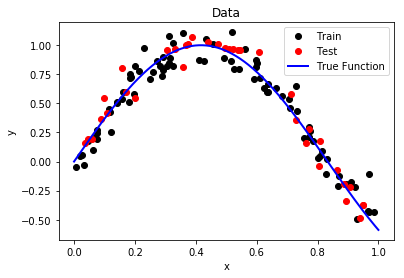

In [4]:
# Visualize observations and true curve
plt.plot(train, y_train, 'ko', label = 'Train'); 
plt.plot(test, y_test, 'ro', label = 'Test')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'True function')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');

**Polynomial Model**

We want to try and capture the data using a polynomial function. A polynomial is defined by the degree, or the highest power for the x-values. A line has a degree of 1 because it is of the form $y = m_1*x + c$ where $m$ is the slope and $c$ is the intercept. A third degree polynomial would have the form $y = m_3 * x^3 + m_2 * x^2 + m_1* x + c$ and so on. The higher the degree of the polynomial, the more flexible the model.

The following function creates a polynomial with the specified number of degrees and plots the results. We can use these results to determine the optimal degrees to achieve the right balance between over and underfitting.

In [5]:
def fit_poly(train, y_train, test, y_test, degrees, plot='train', return_scores=False):
    
    # Create a polynomial transformation of features
    features = PolynomialFeatures(degree=degrees, include_bias=False)
    
    # Reshape training features for use in scikit-learn and transform features
    train = train.reshape((-1, 1))
    train_trans = features.fit_transform(train)
    
    # Create the linear regression model and train
    model = LinearRegression()
    model.fit(train_trans, y_train) 
    
    # Train set predictions and error
    train_predictions = model.predict(train_trans)
    training_error = mean_squared_error(y_train, train_predictions) # Format test features
    test = test.reshape((-1, 1))
    test_trans = features.fit_transform(test)
    
    # Test set predictions and error
    test_predictions = model.predict(test_trans)
    testing_error = mean_squared_error(y_test, test_predictions)
    
    # Find the model curve and the true curve
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape((-1, 1))
    x_curve_trans = features.fit_transform(x_curve)
    
    # Model curve
    model_curve = model.predict(x_curve_trans)
    
    # True curve
    y_true_curve = true_gen(x_curve[:, 0])
    
    # Plot observations, true function, and model predicted function
    if plot == 'train':
        plt.plot(train[:, 0], y_train, 'ko', label = 'Observations')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'True Function')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Model Function')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Degree Model on Training Data'.format(degrees))
        plt.show()
        
    elif plot == 'test':
        # Plot the test observations and test predictions
        plt.plot(test, y_test, 'o', label = 'Test Observations')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'True Function')
        plt.plot(test, test_predictions, 'ro', label = 'Test Predictions')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y'); plt.title('{} Degree Model on Testing Data'.format(degrees)), plt.show();
    
     # Return the metrics
    if return_scores:
        return training_error, testing_error


**Model with Different Degrees** 

Degrees = 1 -> Underfitting

For example, a degree-1 polynomial fits a straight line to the data. In this case a linear model cannot accurately learn the relationship between x and y so it will underfit the data. This is because an underfit model has low variance and high bias. Variance refers to how much the model is dependent on the training data.

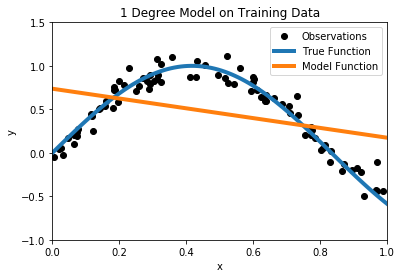

In [20]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

 The model predictions for the testing data are shown compared to the true function and testing data points

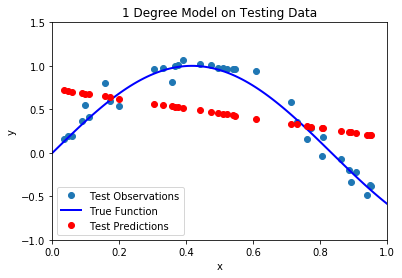

In [21]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='test')

**Degrees = 25 -> Overfitting**
 An overfit model will have extremely low training error but a high testing error.

We can go in the completely opposite direction and create a model that overfits the data. This model has too much flexibility and learns the training data too closely. As the training data has some amount of noise, it will end up capturing that noise and will be misled by that noise when it tries to make predictions on the test data.

This is a model with a high variance, because it will change significantly depending on the training data.

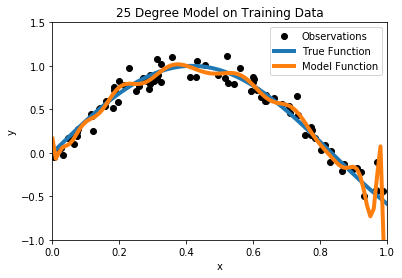

In [8]:
fit_poly(train, y_train, test, y_test, degrees = 25, plot='train')

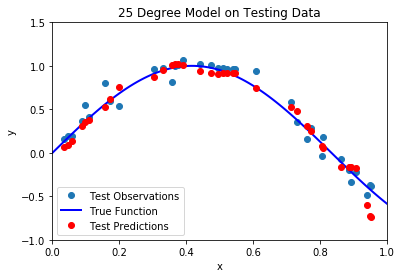

In [9]:
fit_poly(train, y_train, test, y_test, degrees = 25, plot='test')

**Degrees = 5 -> Balanced Model**

Now that we have seen the two extremes, we can take a look at a model that does a good job of both accounting for the data while not following it too closely.


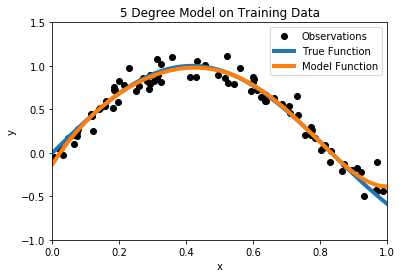

In [10]:
fit_poly(train, y_train, test, y_test, degrees = 5, plot='train')

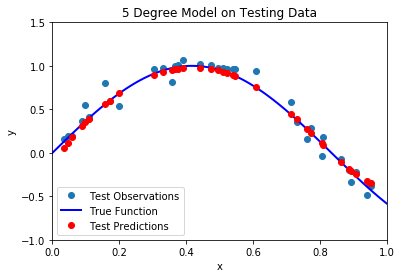

In [11]:
fit_poly(train, y_train, test, y_test, degrees = 5, plot='test')

In [12]:
# Range of model degrees to evaluate
degrees = [int(x) for x in np.linspace(1, 40, 40)]

# Results dataframe
results = pd.DataFrame(0, columns = ['train_error', 'test_error'], index = degrees)

# Try each value of degrees for the model and record results
for degree in degrees:
    degree_results = fit_poly(train, y_train, test, y_test, degree, plot=False)
    results.loc[degree, 'train_error'] = degree_results[0]
    results.loc[degree, 'test_error'] = degree_results[1]

**Evaluate Models**

We will use a range of values to see how the performance on the training and testing set compares. A model with much lower errors on the training data than the testing data is overfit. A model with high error on the training data (which will lead to high testing error as well) is underfitting because it does not even learn the training data.

In [15]:
print('Training Errors\n')
train_eval = results.sort_values('train_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'train_error']] .head(10)

Training Errors



,degrees,train_error
0,36,0.006145
1,40,0.006210
2,35,0.006217
3,39,0.006264
4,31,0.006384
5,32,0.006420
6,27,0.006429
7,28,0.006439
8,33,0.006444
9,34,0.006467


In [16]:
print('Testing Errors\n')
train_eval = results.sort_values('test_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'test_error']] .head(10)

Testing Errors



,degrees,test_error
0,5,0.009482
1,6,0.010215
2,4,0.010483
3,8,0.010609
4,7,0.010618
5,9,0.010754
6,14,0.011216
7,10,0.011321
8,11,0.011342
9,13,0.011387


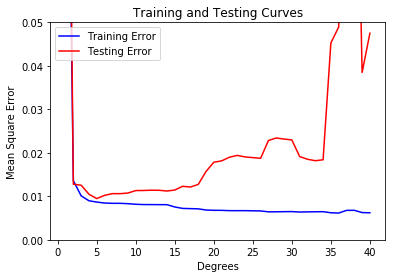


Minimum Training Error occurs at 36 degrees.
Minimum Testing Error occurs at 5 degrees.



In [22]:
#plotting both the train and test against the model complexity
plt.plot(results.index, results['train_error'], 'b', ms=6, label = 'Training Error')
plt.plot(results.index, results['test_error'], 'r', ms=6, label = 'Testing Error')
plt.legend(loc=2)
plt.xlabel('Degrees')
plt.ylabel('Mean Square Error')
plt.title('Training and Testing Curves');
plt.ylim(0, 0.05) 
plt.show()

print('\nMinimum Training Error occurs at {} degrees.'.format(int(np.argmin(results['train_error']))))
print('Minimum Testing Error occurs at {} degrees.\n'.format(int(np.argmin(results['test_error']))))

**Exercise** change the degree values and see how the higher power allowing the model to fit as many data points as possible.